In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Houseprice_Data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

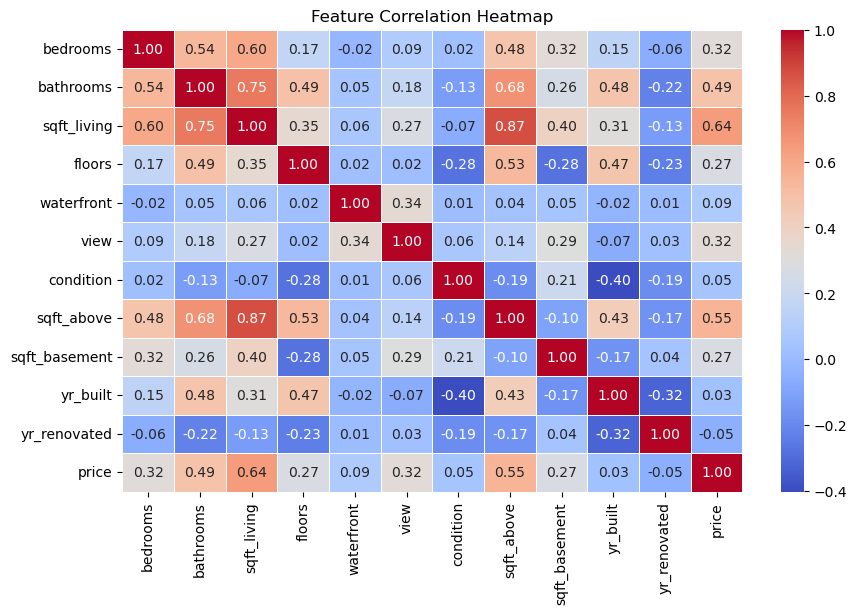

In [27]:
# Select relevant columns
a = df[["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view", 
        "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "price"]]

# Compute correlation matrix
b = a.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(b, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
df["price"].mean()

551962.9884732141

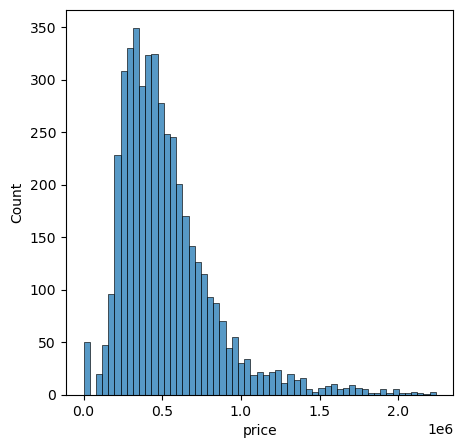

In [49]:
plt.figure(figsize=(5,5))
sns.histplot(df["price"])
plt.show()

In [21]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df["price"]))
df = df[(z_scores < 3)]  # Keeping data within 3 standard deviations

In [28]:
x = df[["sqft_living", "sqft_above", "bathrooms", "view"]]
y = df["price"]

In [22]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [32]:
# Define independent (X) and dependent variable (y)
x = df[["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"]]
y = df["price"]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(3652, 11)

In [34]:
Y_train.shape

(3652,)

In [35]:
X_test.shape

(914, 11)

In [36]:
Y_test.shape

(914,)

In [37]:
y.head(10)

0     313000
2     342000
3     420000
4     550000
5     490000
6     335000
7     482000
8     452500
9     640000
10    463000
Name: price, dtype: int32

In [39]:
#model 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [40]:
lr.fit(X_train, Y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)

In [42]:
y_pred = lr.predict(X_test.iloc[[3]])
y_pred

array([513357.33834865])

In [58]:
print(y_pred.shape)          
print(Y_test.shape)

(1,)
(914,)
